In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/wear dataset.csv')

In [ ]:
df.describe()

,speed,load,time,wear
count,4001.000000,4001.000000,4001.000000,4001.000000
mean,746.188453,11.515871,480.175907,12.618414
std,250.002187,4.777061,316.160523,31.781355
min,500.000000,5.000000,0.000000,-81.196600
25%,500.000000,10.000000,200.000000,-5.743600
50%,500.000000,10.000000,490.692000,10.883200
75%,1000.000000,15.000000,727.669000,32.307700
max,1000.000000,20.000000,1500.380000,127.635000


In [ ]:
df.isna().sum()

speed     0
load      0
time      0
wear      0
dtype: int64

In [ ]:
df.head()

,speed,load,time,wear
0,500,5,0.0000,0.0000
1,500,5,3.3333,-0.1280
2,500,5,3.5714,-0.0462
3,500,5,5.4762,-0.5795
4,500,5,5.4762,-0.4564


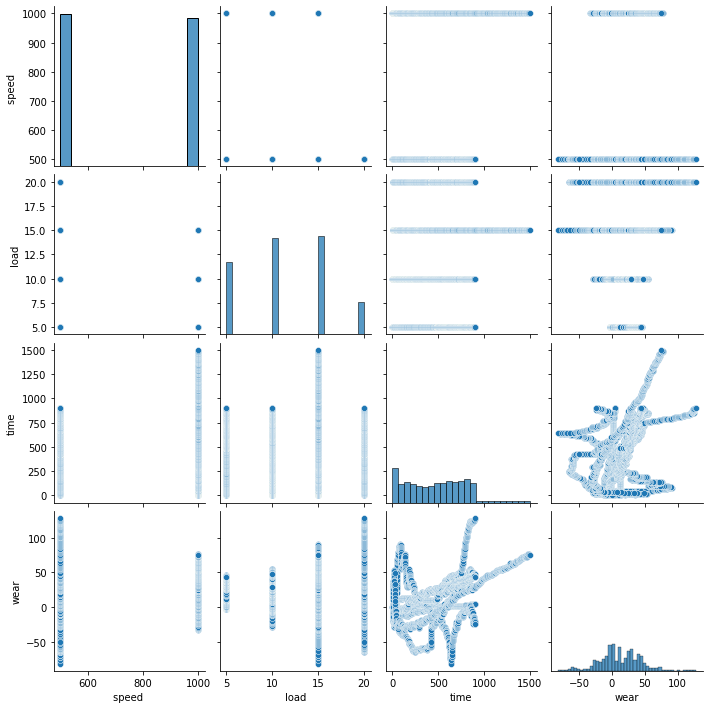

In [ ]:
sns.pairplot(df)

In [ ]:
df.iloc[:,:3]

,speed,load,time
0,500,5,0.0000
1,500,5,3.3333
2,500,5,3.5714
3,500,5,5.4762
4,500,5,5.4762
...,...,...,...
3996,1000,15,1484.0600
3997,1000,15,1484.0600
3998,1000,15,1487.9200
3999,1000,15,1490.0700


In [ ]:
x = df.iloc[:,:3]
y = df['wear'].values.reshape(-1, 1)
print(f"x shape{x.shape}")
print(f"y shape{y.shape}")

x shape(4001, 3)
y shape(4001, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(3200, 3)
y train shape(3200, 1)
x test shape(400, 3)
y test shape(400, 1)
x val shape(401, 3)
y val shape(401, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
model = Sequential([

tf.keras.layers.InputLayer(3,),
Dense(512,activation='relu'),
Dense(512,activation='relu'),
Dense(512,activation='relu'),
Dense(512,activation='relu'),
Dense(1)
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               2048      
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 790,529
Trainable params: 790,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
history = model.fit(x=X_train,y=y_train,epochs=400,validation_data=(X_val,y_val))

Epoch 1/400
100/100 [==============================] - 2s 14ms/step - loss: 990.1271 - val_loss: 717.3015
Epoch 2/400
100/100 [==============================] - 1s 12ms/step - loss: 646.9636 - val_loss: 502.8393
Epoch 3/400
100/100 [==============================] - 1s 12ms/step - loss: 362.6068 - val_loss: 235.0457
Epoch 4/400
100/100 [==============================] - 1s 12ms/step - loss: 170.3684 - val_loss: 111.6847
Epoch 5/400
100/100 [==============================] - 1s 12ms/step - loss: 128.1213 - val_loss: 88.1106
Epoch 6/400
100/100 [==============================] - 1s 12ms/step - loss: 110.6052 - val_loss: 79.7065
Epoch 7/400
100/100 [==============================] - 1s 12ms/step - loss: 104.1298 - val_loss: 74.4097
Epoch 8/400
100/100 [==============================] - 1s 12ms/step - loss: 98.3997 - val_loss: 72.5190
Epoch 9/400
100/100 [==============================] - 1s 12ms/step - loss: 97.7113 - val_loss: 67.3644
Epoch 10/400
100/100 [==============================]

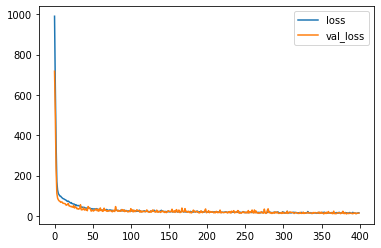

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test[10:20] #actual values

array([[ -1.7778],
       [ -5.7436],
       [-26.9231],
       [-16.9573],
       [-13.1624],
       [ 44.1595],
       [ 33.9601],
       [ 10.1425],
       [ 27.4644],
       [ 44.2165]])

In [ ]:
y_pred[10:20]  #predicted values

array([[ 13.299149 ],
       [ -6.2314515],
       [-25.573454 ],
       [-17.669977 ],
       [-14.772024 ],
       [ 43.504665 ],
       [ 35.342213 ],
       [ 10.667601 ],
       [ 28.087065 ],
       [ 45.27406  ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2 = r2_score(y_test,y_pred)
print(f"R2 score ",r2)
print(f"Mean sqaured errror {mean_squared_error(y_test,y_pred)}")
print("RMSE ",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE ",mean_absolute_error(y_test,y_pred))

print(f"Y_test mean {y_test.mean()}")
print(f"Y_pred mean {y_pred.mean()}")

R2 score  0.9861125938211108
Mean sqaured errror 11.355633693535937
RMSE  1.2148569907225824
MAE  1.8362919253555539
Y_test mean 10.854866000000001
Y_pred mean 10.751954078674316


#Trying to save model in h5 format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/saved model/wear_model_v1.h5'
new_model = model.save(path) 


In [ ]:
new_model_loaded = tf.keras.models.load_model(path)

# Check its architecture
new_model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 790,529
Trainable params: 790,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_new = np.array([[1000,15,1102]])

pred_new = scaler.transform(pred_new)
y_pred_1 =  new_model_loaded.predict(pred_new).round(4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
